In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(20,8)

In [125]:
df=pd.read_csv(r"D:\csv_file\Suicides in India 2001-2012.csv")

In [127]:
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [129]:
df.shape

(237519, 7)

In [131]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [135]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [137]:
df['Type'].unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [139]:
df.groupby('Year')['Total'].sum().to_frame()

,Total
Year,
2001,976464
2002,993648
2003,997622
2004,1023137
2005,1025201
2006,1062991
2007,1103667
2008,1125082
2009,1144033


In [141]:
sucidesperyear=df.groupby('Year')['Total'].sum()
sucidesperyear

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_1400\509089824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sucidesperyear.index, y=sucidesperyear, palette='tab20')


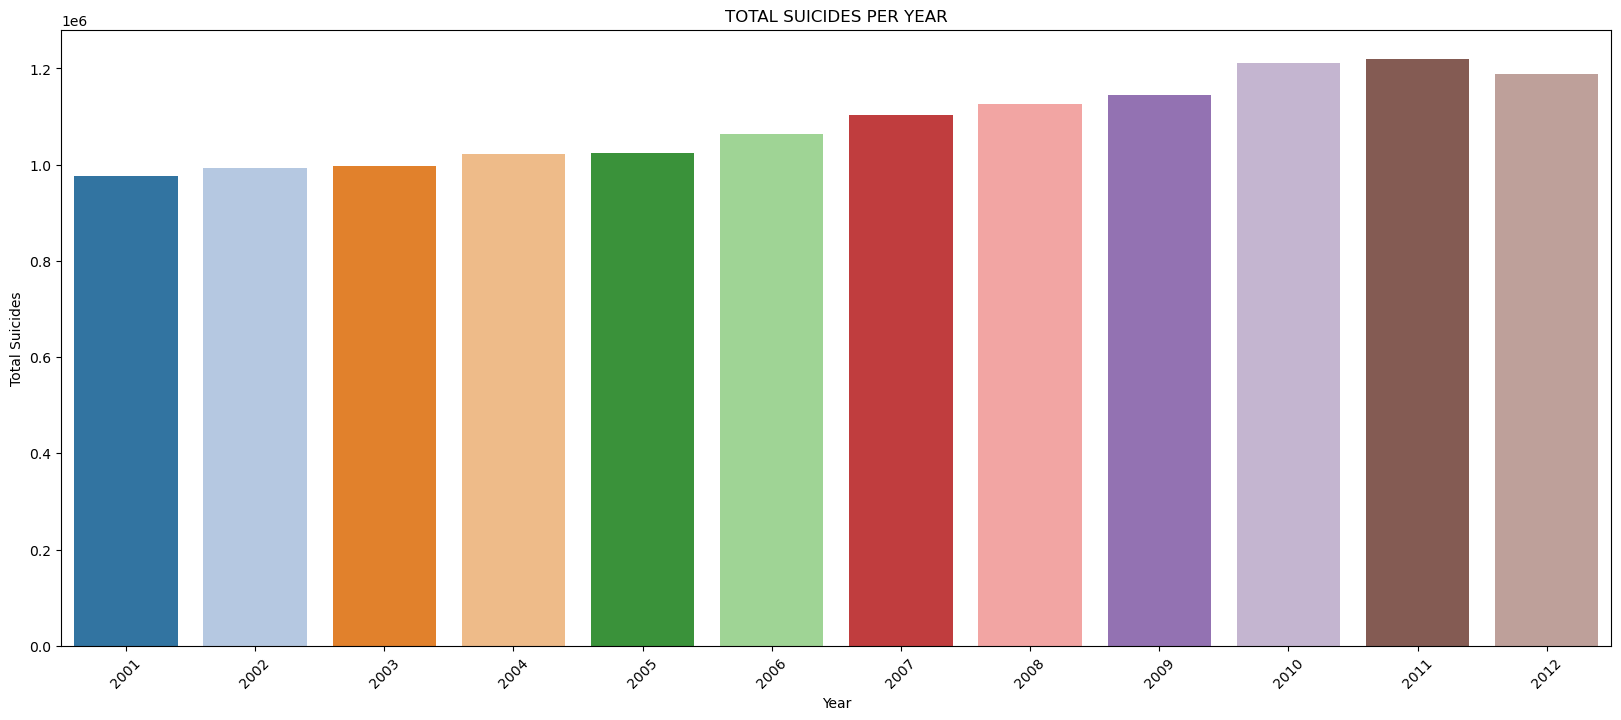

In [145]:
sns.barplot(x=sucidesperyear.index, y=sucidesperyear, palette='tab20')
plt.title("TOTAL SUICIDES PER YEAR")
plt.xlabel("Year")
plt.ylabel("Total Suicides")
plt.xticks(rotation=45)
plt.show()

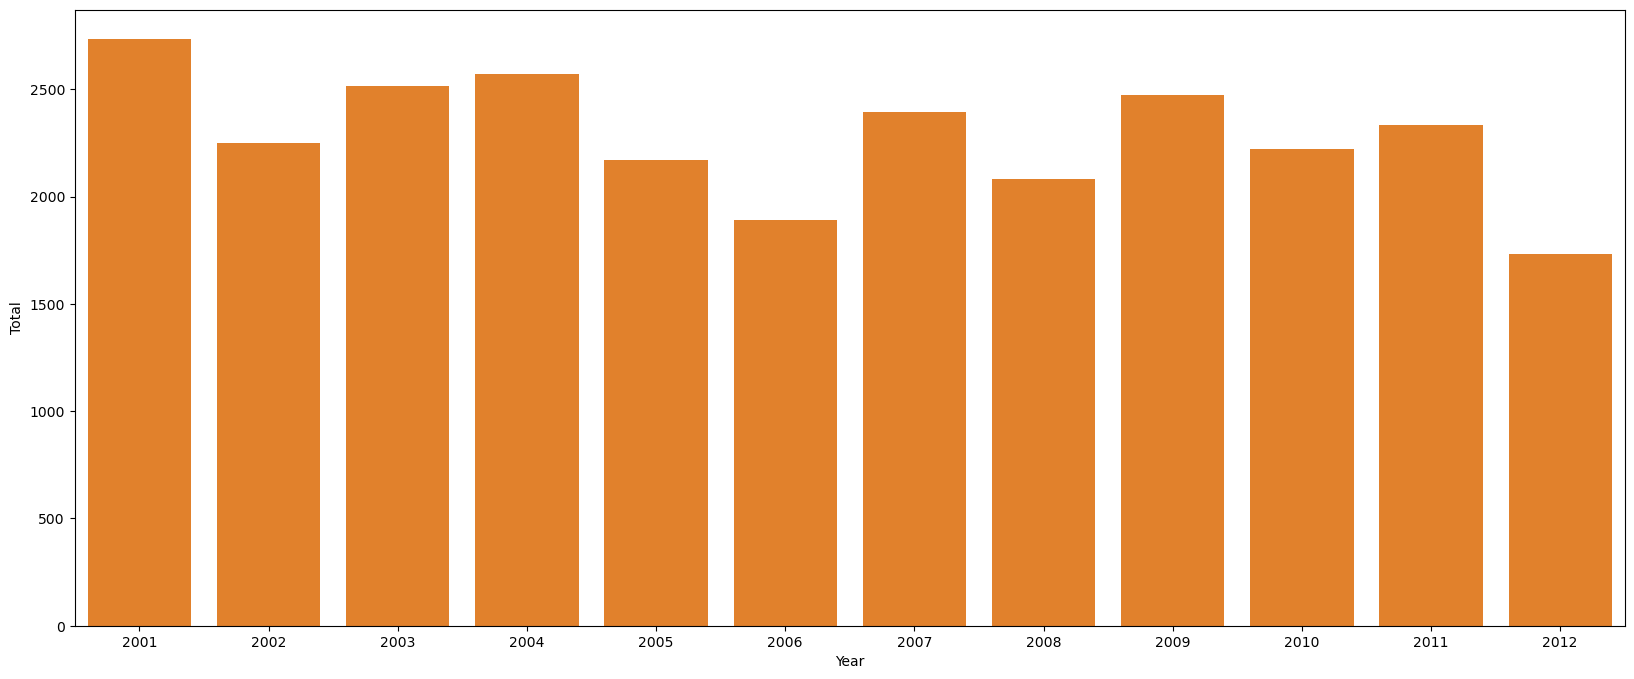

In [151]:
# suiced due to unemployment
suiduetouemp= df[df['Type']=='Unemployment'].groupby("Year")["Total"].sum().sort_values(ascending=False)
sns.barplot(x=suiduetouemp.index, y=suiduetouemp)
plt.show()

In [153]:
#suicide causes
suicauses=df.groupby("Type")['Total'].sum().sort_values(ascending=False)
suicauses

Type
Married                                           3065322
Primary                                           1088481
Middle                                            1028913
No Education                                       965271
Never Married                                      954903
                                                   ...   
Bankruptcy or Sudden change in Economic Status       2655
Illegitimate Pregnancy                               2494
Ideological Causes/Hero Worshipping                  2118
By Machine                                           1661
Not having Children (Barrenness/Impotency             766
Name: Total, Length: 69, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_1400\1015108562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suicauses.index[:5], y=suicauses[:5], palette='tab20')


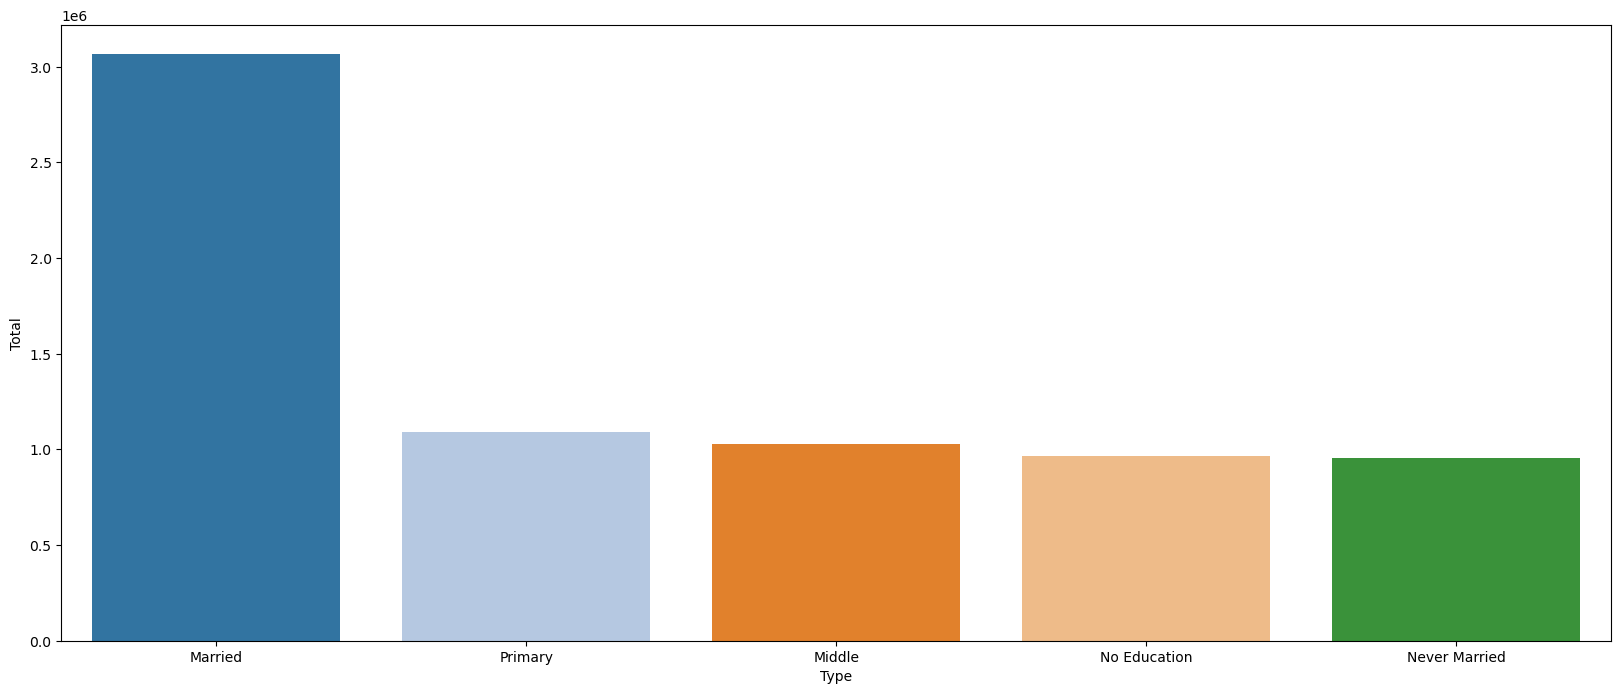

In [159]:
sns.barplot(x=suicauses.index[:5], y=suicauses[:5], palette='tab20')
plt.show()

In [161]:
#gender plays any role
df['Gender'].value_counts()

Gender
Male      118879
Female    118640
Name: count, dtype: int64

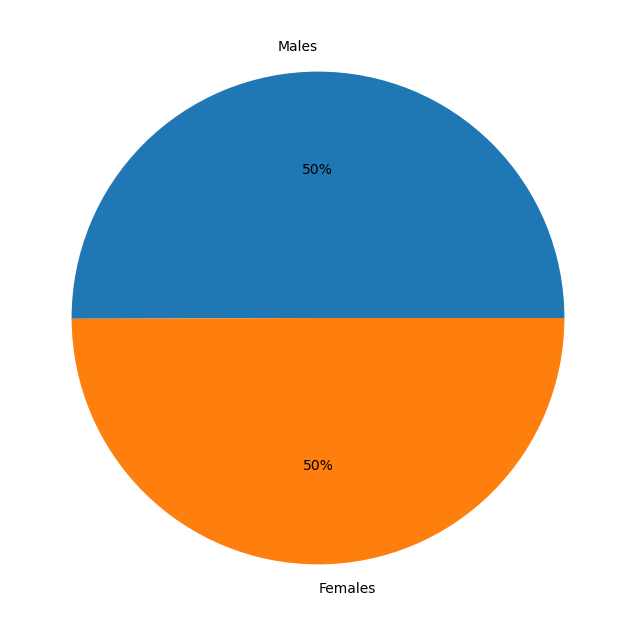

In [163]:
plt.pie(df['Gender'].value_counts(),labels=['Males','Females'],autopct='%1.0f%%')
plt.show()

In [165]:
#age group mostlikely to suicides
df[df['Type']=="Married"]['Gender'].value_counts()

Gender
Female    456
Male      456
Name: count, dtype: int64

In [167]:
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [169]:
suibyagegrp=df['Age_group'].value_counts()
suibyagegrp

Age_group
15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_1400\37868881.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suibyagegrp.index,y=suibyagegrp, palette='tab20')


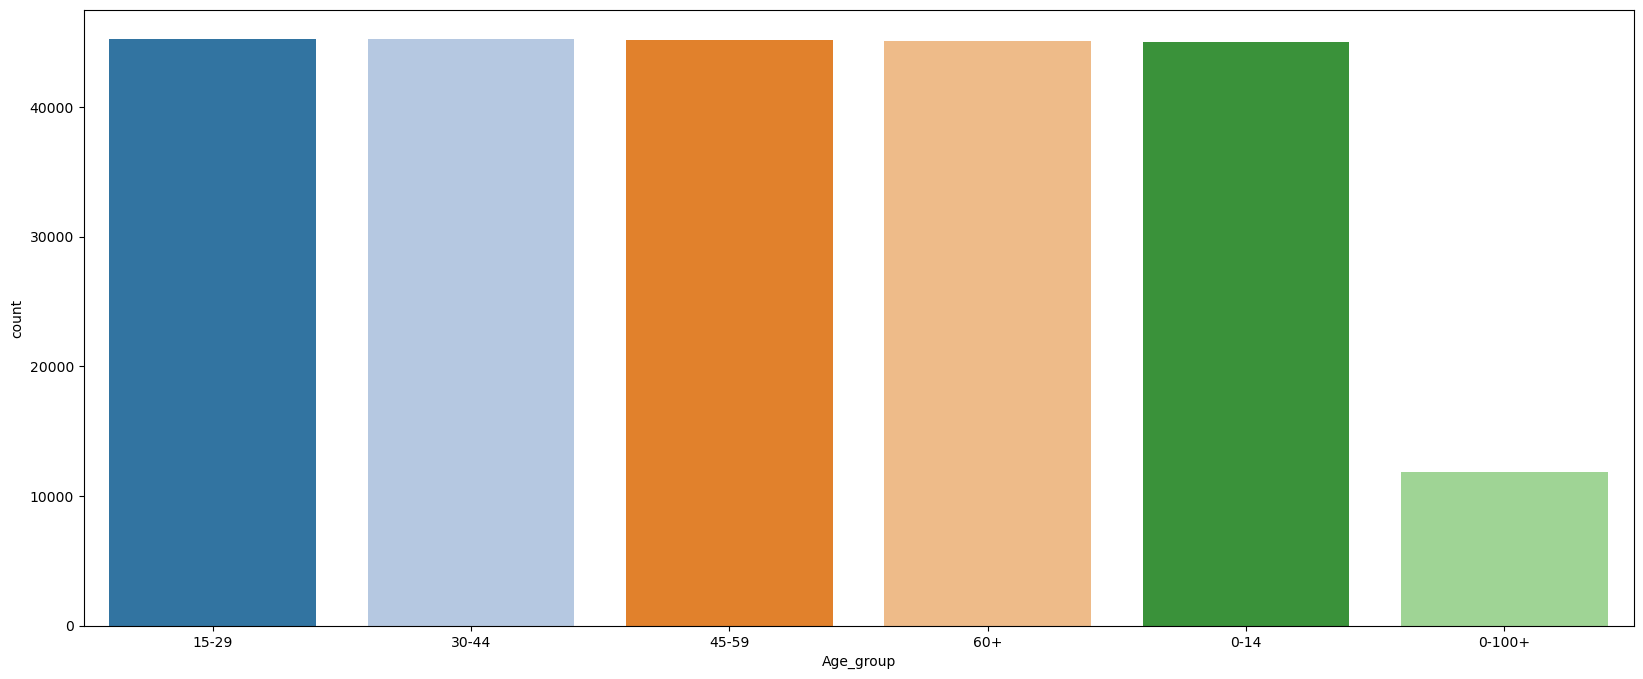

In [171]:
sns.barplot(x=suibyagegrp.index,y=suibyagegrp, palette='tab20')
plt.show()

In [173]:
#states having highest count
suiinstatesasc=df.groupby('State')["Total"].sum().sort_values(ascending=False)
suiinstatesasc

State
Total (All India)    2911862
Total (States)       2858026
Maharashtra           901945
West Bengal           849936
Tamil Nadu            818691
Andhra Pradesh        814059
Karnataka             734825
Kerala                538946
Madhya Pradesh        451535
Gujarat               330858
Chhattisgarh          302354
Odisha                267234
Rajasthan             255134
Uttar Pradesh         233352
Assam                 172276
Haryana               147176
Delhi (Ut)             84272
Total (Uts)            53836
Jharkhand              49720
Punjab                 46350
Bihar                  46214
Tripura                45965
Puducherry             32144
Himachal Pradesh       26562
Uttarakhand            18496
Goa                    17363
Jammu & Kashmir        14821
Sikkim                  9606
A & N Islands           8109
Arunachal Pradesh       6633
Meghalaya               5415
Chandigarh              5164
Mizoram                 4154
D & N Haveli            3430
Manipur 

C:\Users\hp\AppData\Local\Temp\ipykernel_1400\3809453782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suiinstatesasc.index, y=suiinstatesasc, palette='tab20')


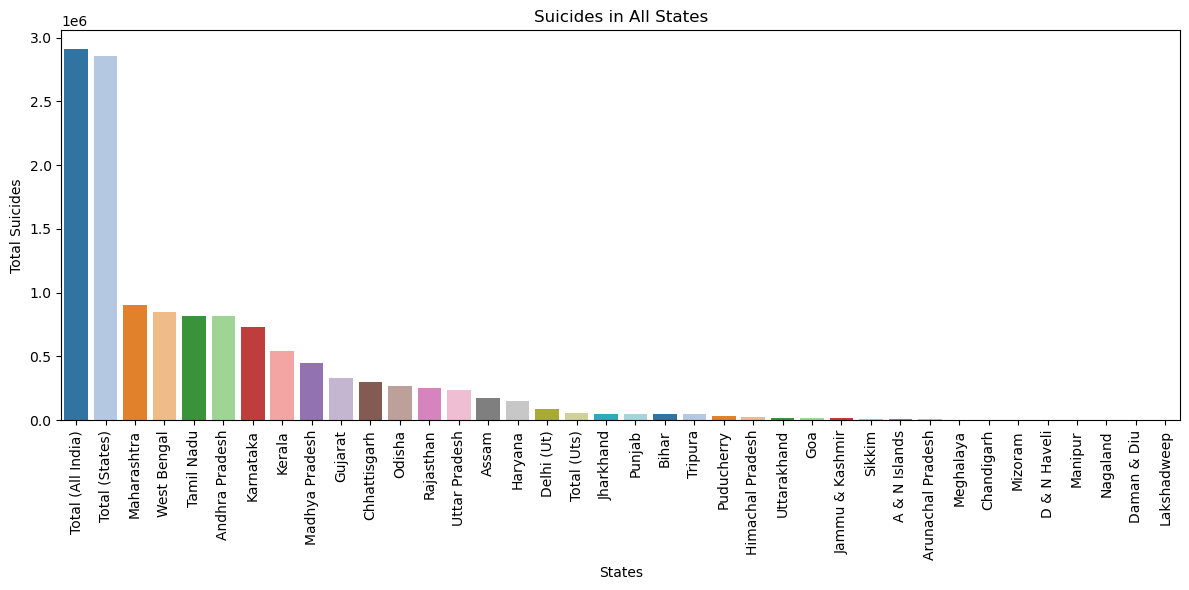

In [236]:
plt.figure(figsize=(12, 6))
sns.barplot(x=suiinstatesasc.index, y=suiinstatesasc, palette='tab20')
plt.xticks(rotation=90)
plt.title("Suicides in All States")
plt.xlabel("States")
plt.ylabel("Total Suicides")
plt.tight_layout()
plt.show()

In [240]:
df["Age_group"].unique()
youthdf=df[(df["Age_group"]=="0-14") | (df["Age_group"]=="15-29") ]
yg=youthdf.groupby('Type')['Total'].sum().sort_values(ascending=False)
yg

Type
By Hanging                                        176914
Others (Please Specify)                           155539
House Wife                                        127984
Family Problems                                   125681
By Consuming Insecticides                         104929
Causes Not known                                   90839
By Consuming Other Poison                          85190
Other Causes (Please Specity)                      81003
Student                                            70838
By Fire/Self Immolation                            57408
Farming/Agriculture Activity                       53741
Other Prolonged Illness                            52458
Unemployed                                         47123
By Other means (please specify)                    44724
Service (Private)                                  39512
By Drowning                                        37282
Love Affairs                                       34273
Insanity/Mental Illness   

In [246]:
# Top reason of suicide 
sns.barplot(x=yg.index[:9],y=yg[:9],palette='tab20')
plt.xticks(rotation=40)

C:\Users\hp\AppData\Local\Temp\ipykernel_1400\3084048714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yg.index[:9],y=yg[:9],palette='tab20')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'By Hanging'),
  Text(1, 0, 'Others (Please Specify)'),
  Text(2, 0, 'House Wife'),
  Text(3, 0, 'Family Problems'),
  Text(4, 0, 'By Consuming Insecticides'),
  Text(5, 0, 'Causes Not known'),
  Text(6, 0, 'By Consuming Other Poison'),
  Text(7, 0, 'Other Causes (Please Specity)'),
  Text(8, 0, 'Student')])

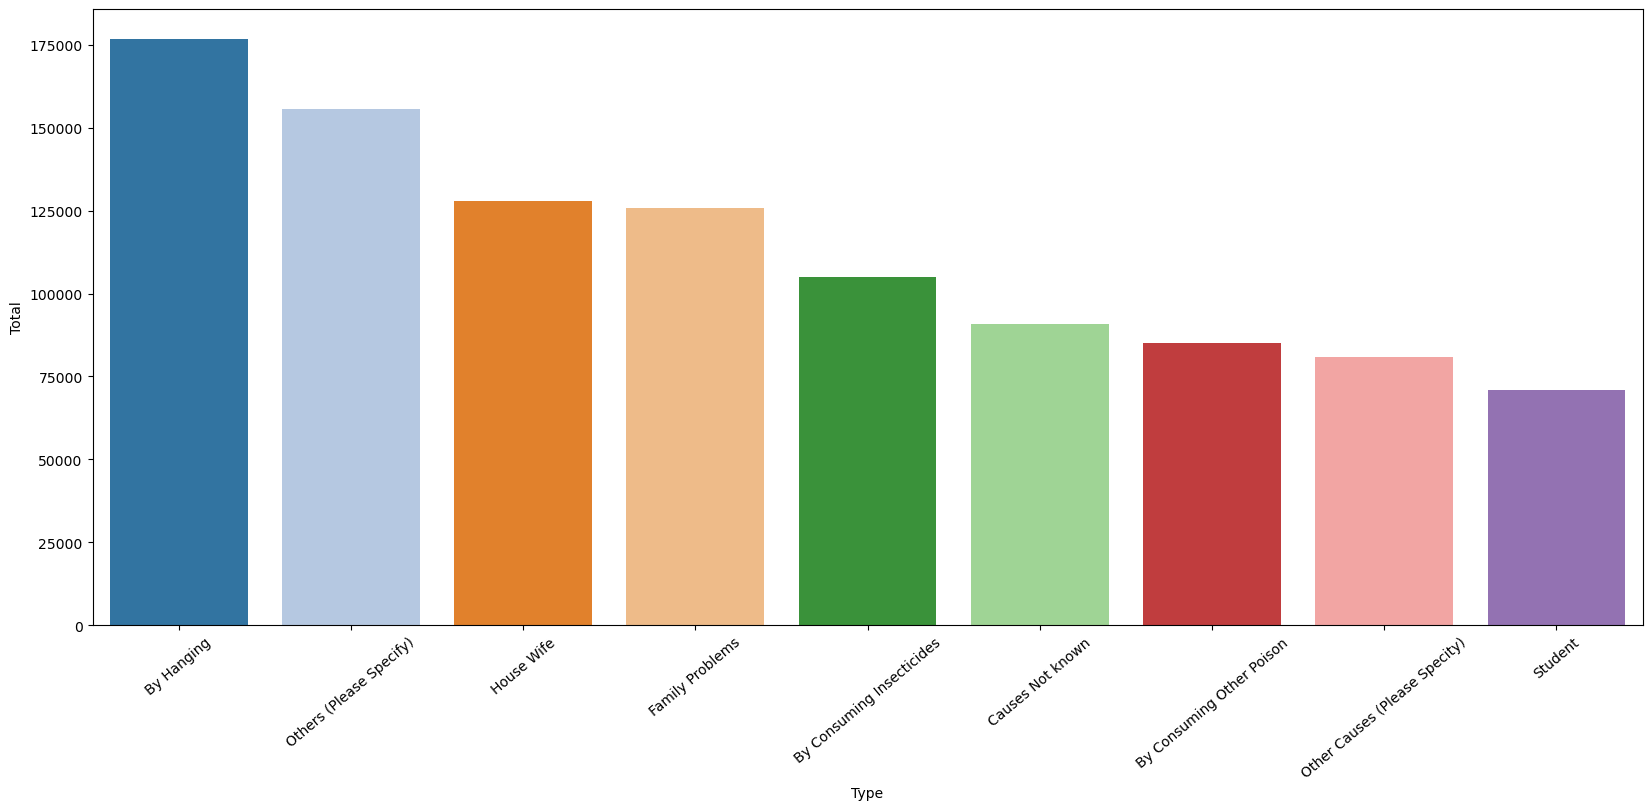

In [248]:
plt.show()

In [250]:
# Least suicide reason 
sns.barplot(x=yg.index[:9],y=yg[:9], palette='tab20')
plt.xticks(rotation=40)

C:\Users\hp\AppData\Local\Temp\ipykernel_1400\3015840677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yg.index[:9],y=yg[:9], palette='tab20')


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'By Hanging'),
  Text(1, 0, 'Others (Please Specify)'),
  Text(2, 0, 'House Wife'),
  Text(3, 0, 'Family Problems'),
  Text(4, 0, 'By Consuming Insecticides'),
  Text(5, 0, 'Causes Not known'),
  Text(6, 0, 'By Consuming Other Poison'),
  Text(7, 0, 'Other Causes (Please Specity)'),
  Text(8, 0, 'Student')])

C:\Users\hp\AppData\Local\Temp\ipykernel_1400\1485535589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yg_sorted.index, y=yg_sorted, palette='tab20')


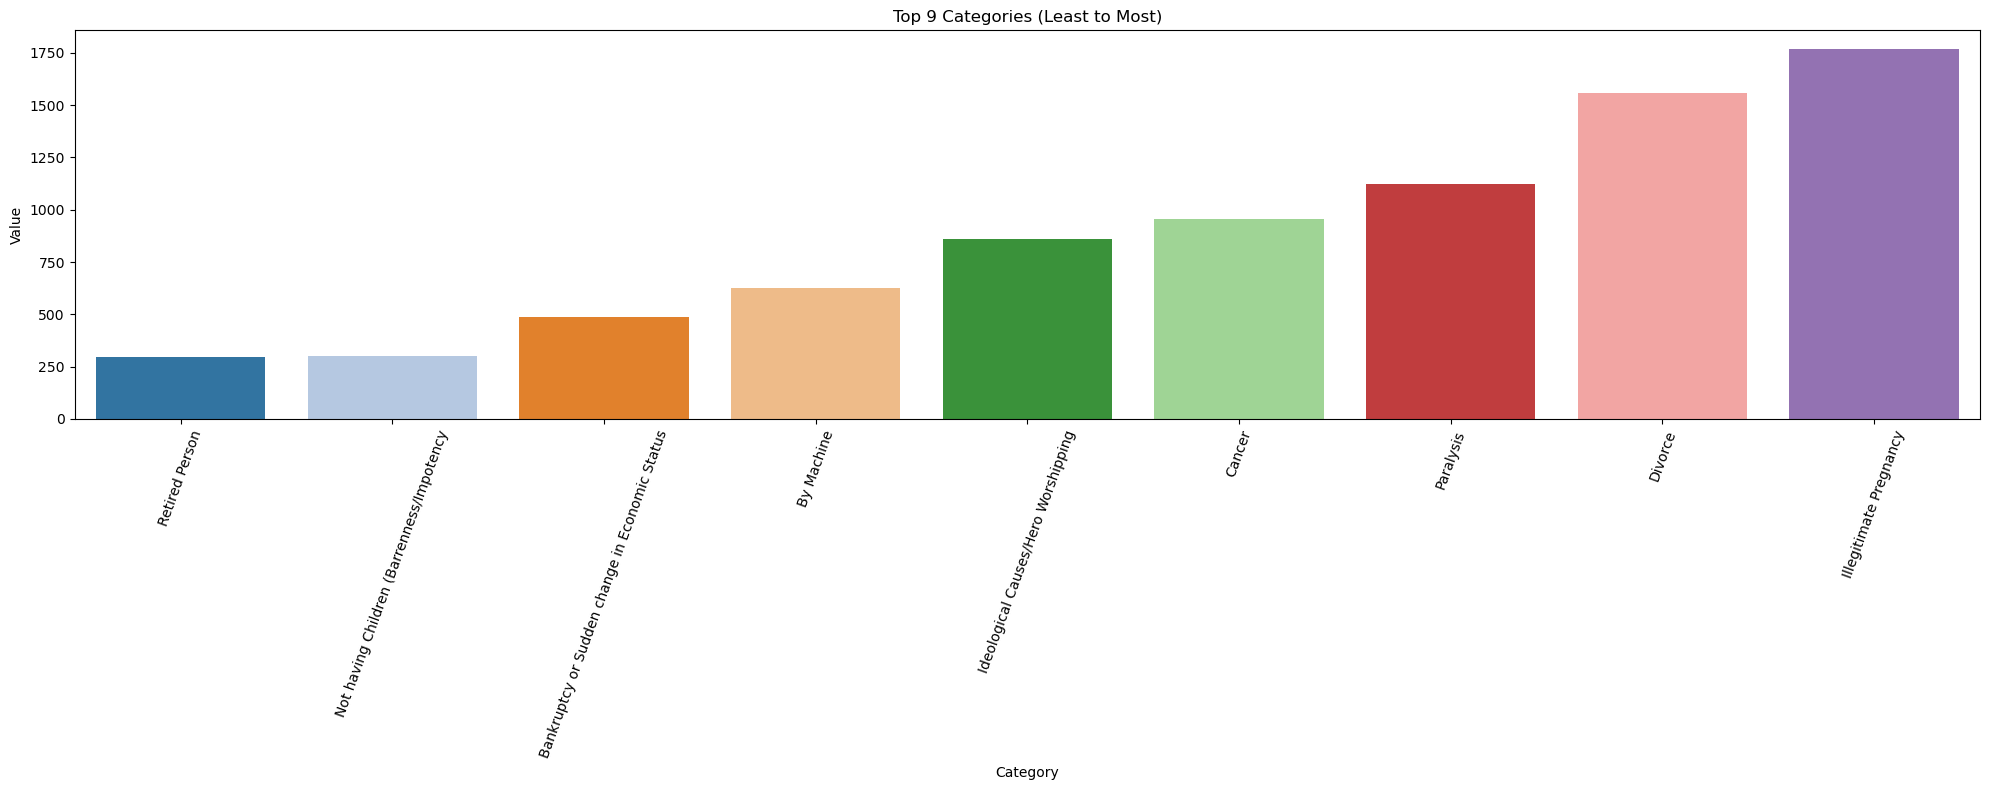

In [262]:
yg_sorted = yg.sort_values().head(9)
sns.barplot(x=yg_sorted.index, y=yg_sorted, palette='tab20')
plt.xticks(rotation=70)
plt.title("Top 9 Categories (Least to Most)")
plt.xlabel("Category")
plt.ylabel("Value")
plt.tight_layout()
plt.show()